In [2]:
### Healthcare Premium Prediction

In [3]:
# import the libraries 

import pandas as pd # data 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , train_test_split

In [4]:
# Import the datasets 

df = pd.read_excel("premiums_rest.xlsx")
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [5]:
#Check the shape of datasets 

df.shape

(29904, 13)

In [6]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [7]:
#Inconsistence columns name changing lowercase and "_" on datasets 

df.columns = df.columns.str.replace(" ", "_").str.lower()

In [8]:
df

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076


### Handle NA Values

In [9]:
#Check null values in each column 

df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

## Check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

### Check quick stats of the datasets

In [12]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


## Check number_of_dependants columns to view the rows having negative values 

In [13]:
df[df["number_of_dependants"] < 0]["number_of_dependants"].unique()

array([-1, -3])

In [14]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### Check Outliers in datasets

In [15]:
numeric_columns = df.select_dtypes(['float64', 'int64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

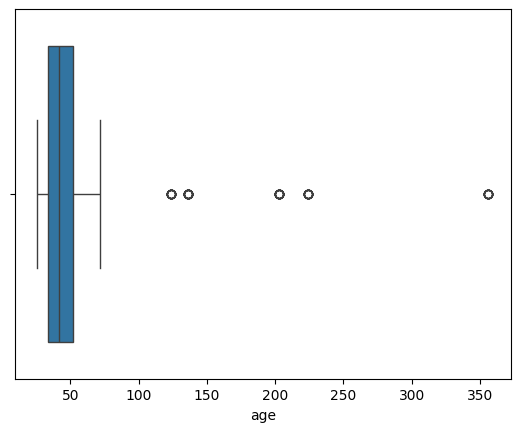

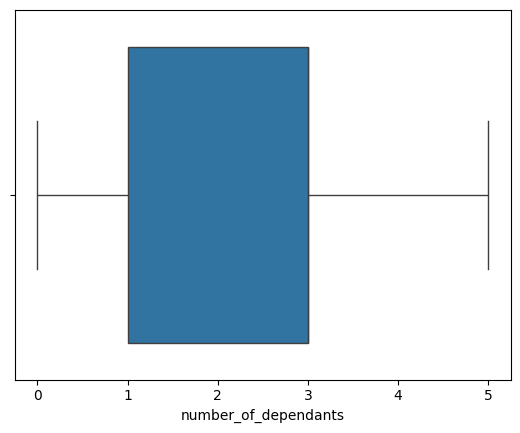

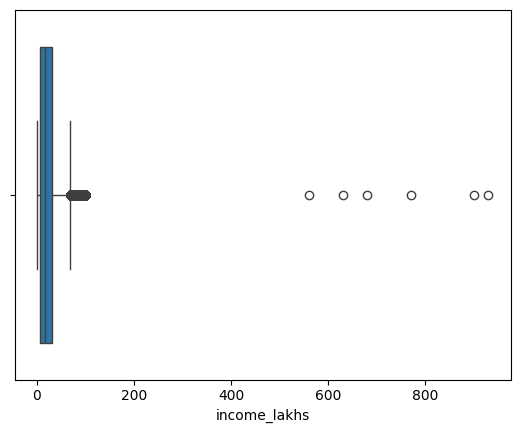

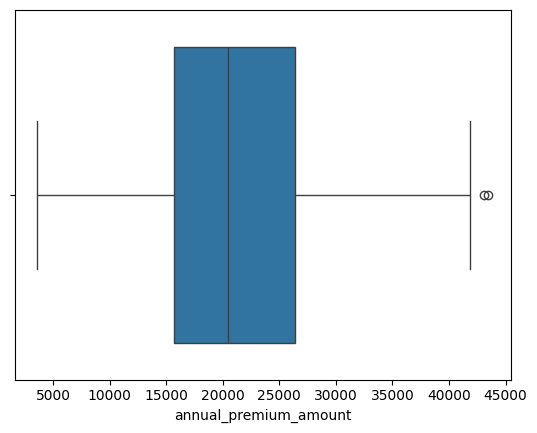

In [16]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [17]:
## Include age <=100    in the dataset 

df1 = df[df['age']<=100].copy()

In [18]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


In [19]:
### Use IQR to remove outliers for income 
## Create functions 

def get_iqr_bounds(col):
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1 
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound,upper_bound

In [20]:
quantile_threshold = get_iqr_bounds(df1['income_lakhs'])
quantile_threshold

(-30.5, 69.5)

## The upperbound is relatively lesser than hence we might use 0.999 quantile than IQR method

In [21]:
quantile_threshold2 = df1['income_lakhs'].quantile(0.999)
quantile_threshold2

np.float64(100.0)

In [22]:
df2 = df1[df1['income_lakhs']<=quantile_threshold2].copy()

In [23]:
df2

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29899,60,Female,Northwest,Married,3,Normal,No Smoking,Self-Employed,25L - 40L,26,High blood pressure,Gold,26370
29900,40,Female,Southeast,Unmarried,0,Overweight,Regular,Salaried,10L - 25L,16,Diabetes & Thyroid,Gold,29496
29901,37,Female,Northwest,Unmarried,0,Obesity,No Smoking,Salaried,<10L,4,No Disease,Bronze,10957
29902,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076


In [24]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,23.226343,20900.689223
std,11.042430,1.420644,22.455408,6928.192115
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15705.250000
50%,42.000000,3.000000,17.000000,20495.500000
75%,52.000000,3.000000,32.000000,26360.000000
max,72.000000,5.000000,100.000000,43471.000000


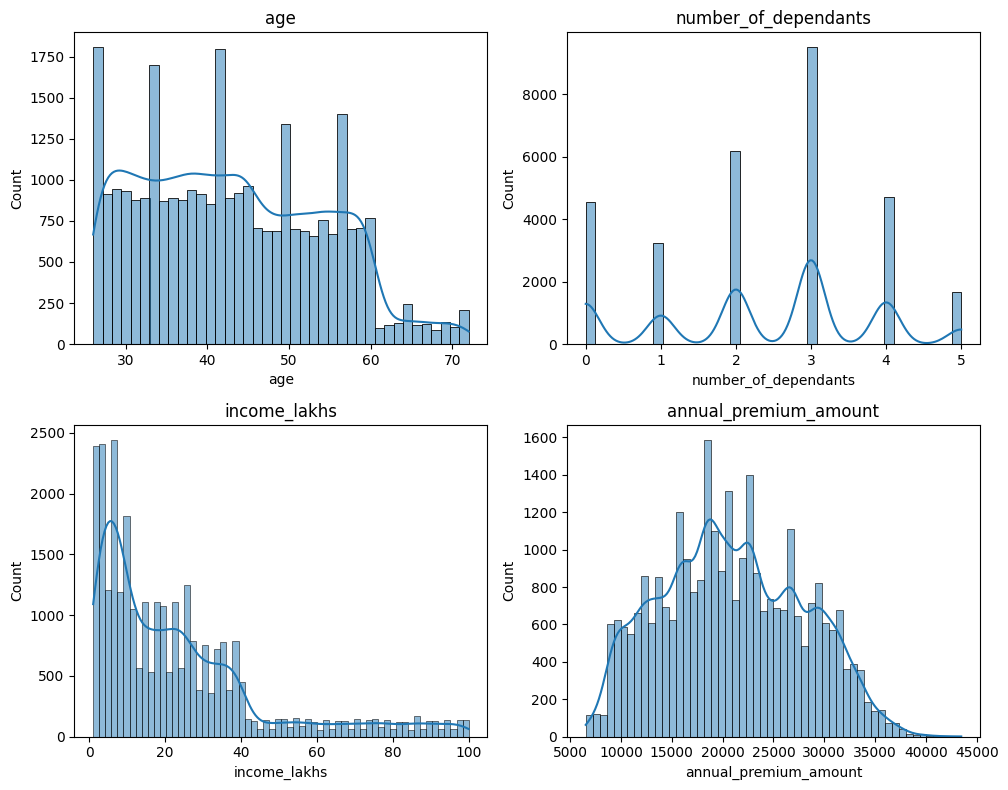

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8)) 

for i, column in enumerate(numeric_columns):
    ax = axs[i // 2, i% 2] 
    sns.histplot(df2[column],kde=True,ax=ax)
    ax.set_title(column)
plt.tight_layout()
plt.show()

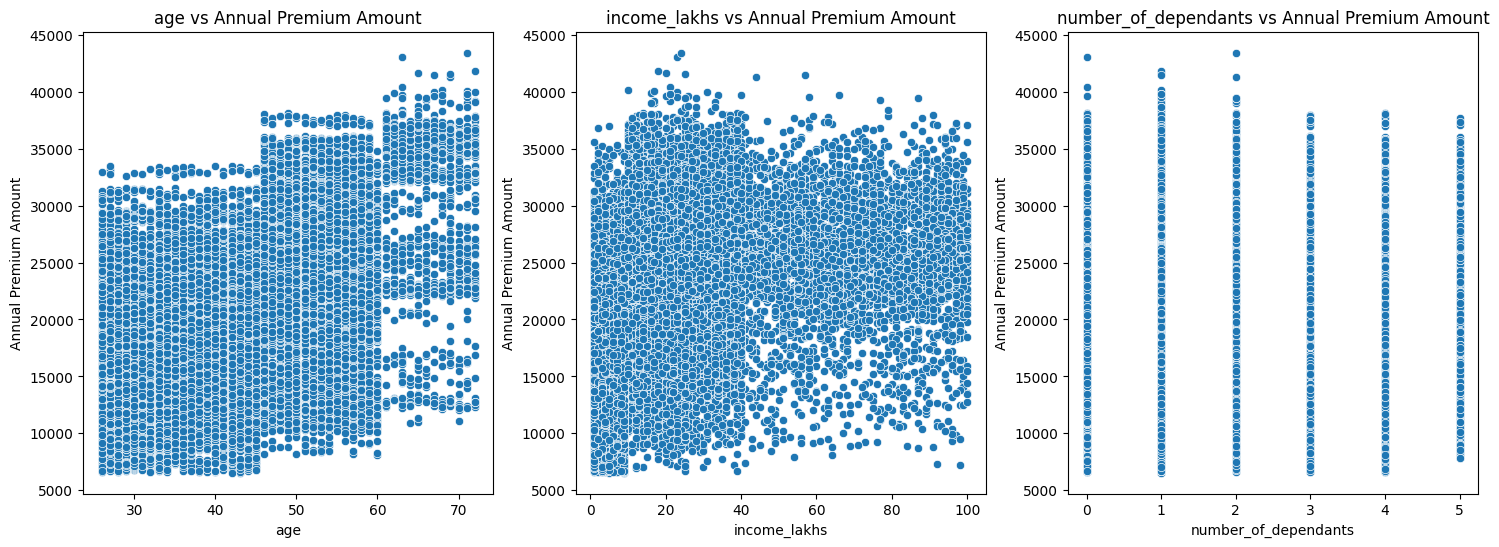

In [26]:
# Draw scatter plot 

numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig , axes = plt.subplots(1,len(numeric_features), figsize=(18, 6)) 

for ax , column in zip(axes,numeric_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'],ax=ax)
    ax.set_title(f'{column} vs Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout 
plt.show()

### Analyse categorical variables

In [27]:
categorical_columns = df2.select_dtypes(['object']).columns
categorical_columns


Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [28]:
for col in categorical_columns:
    print(col, ":",df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [29]:
df2['smoking_status'].replace({
    'Smoking=0' : 'No Smoking', 
    'Does Not Smoke' : 'No Smoking', 
    'Not Smoking' : 'No Smoking'      
},inplace=True)

C:\Users\prati\AppData\Local\Temp\ipykernel_29096\2031420591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


In [30]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [31]:
pct_count_gender = df2['gender'].value_counts(normalize=True)
pct_count_gender

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

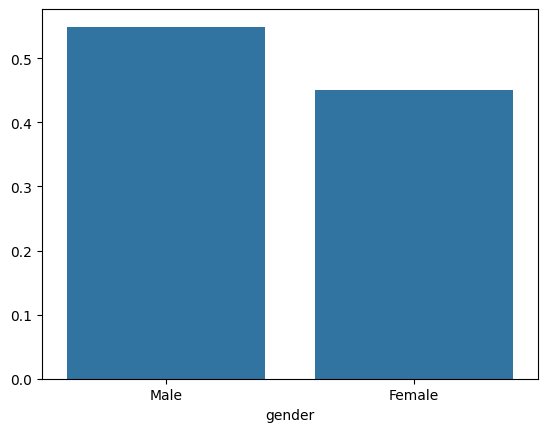

In [32]:
sns.barplot(x=pct_count_gender.index, y=pct_count_gender.values)

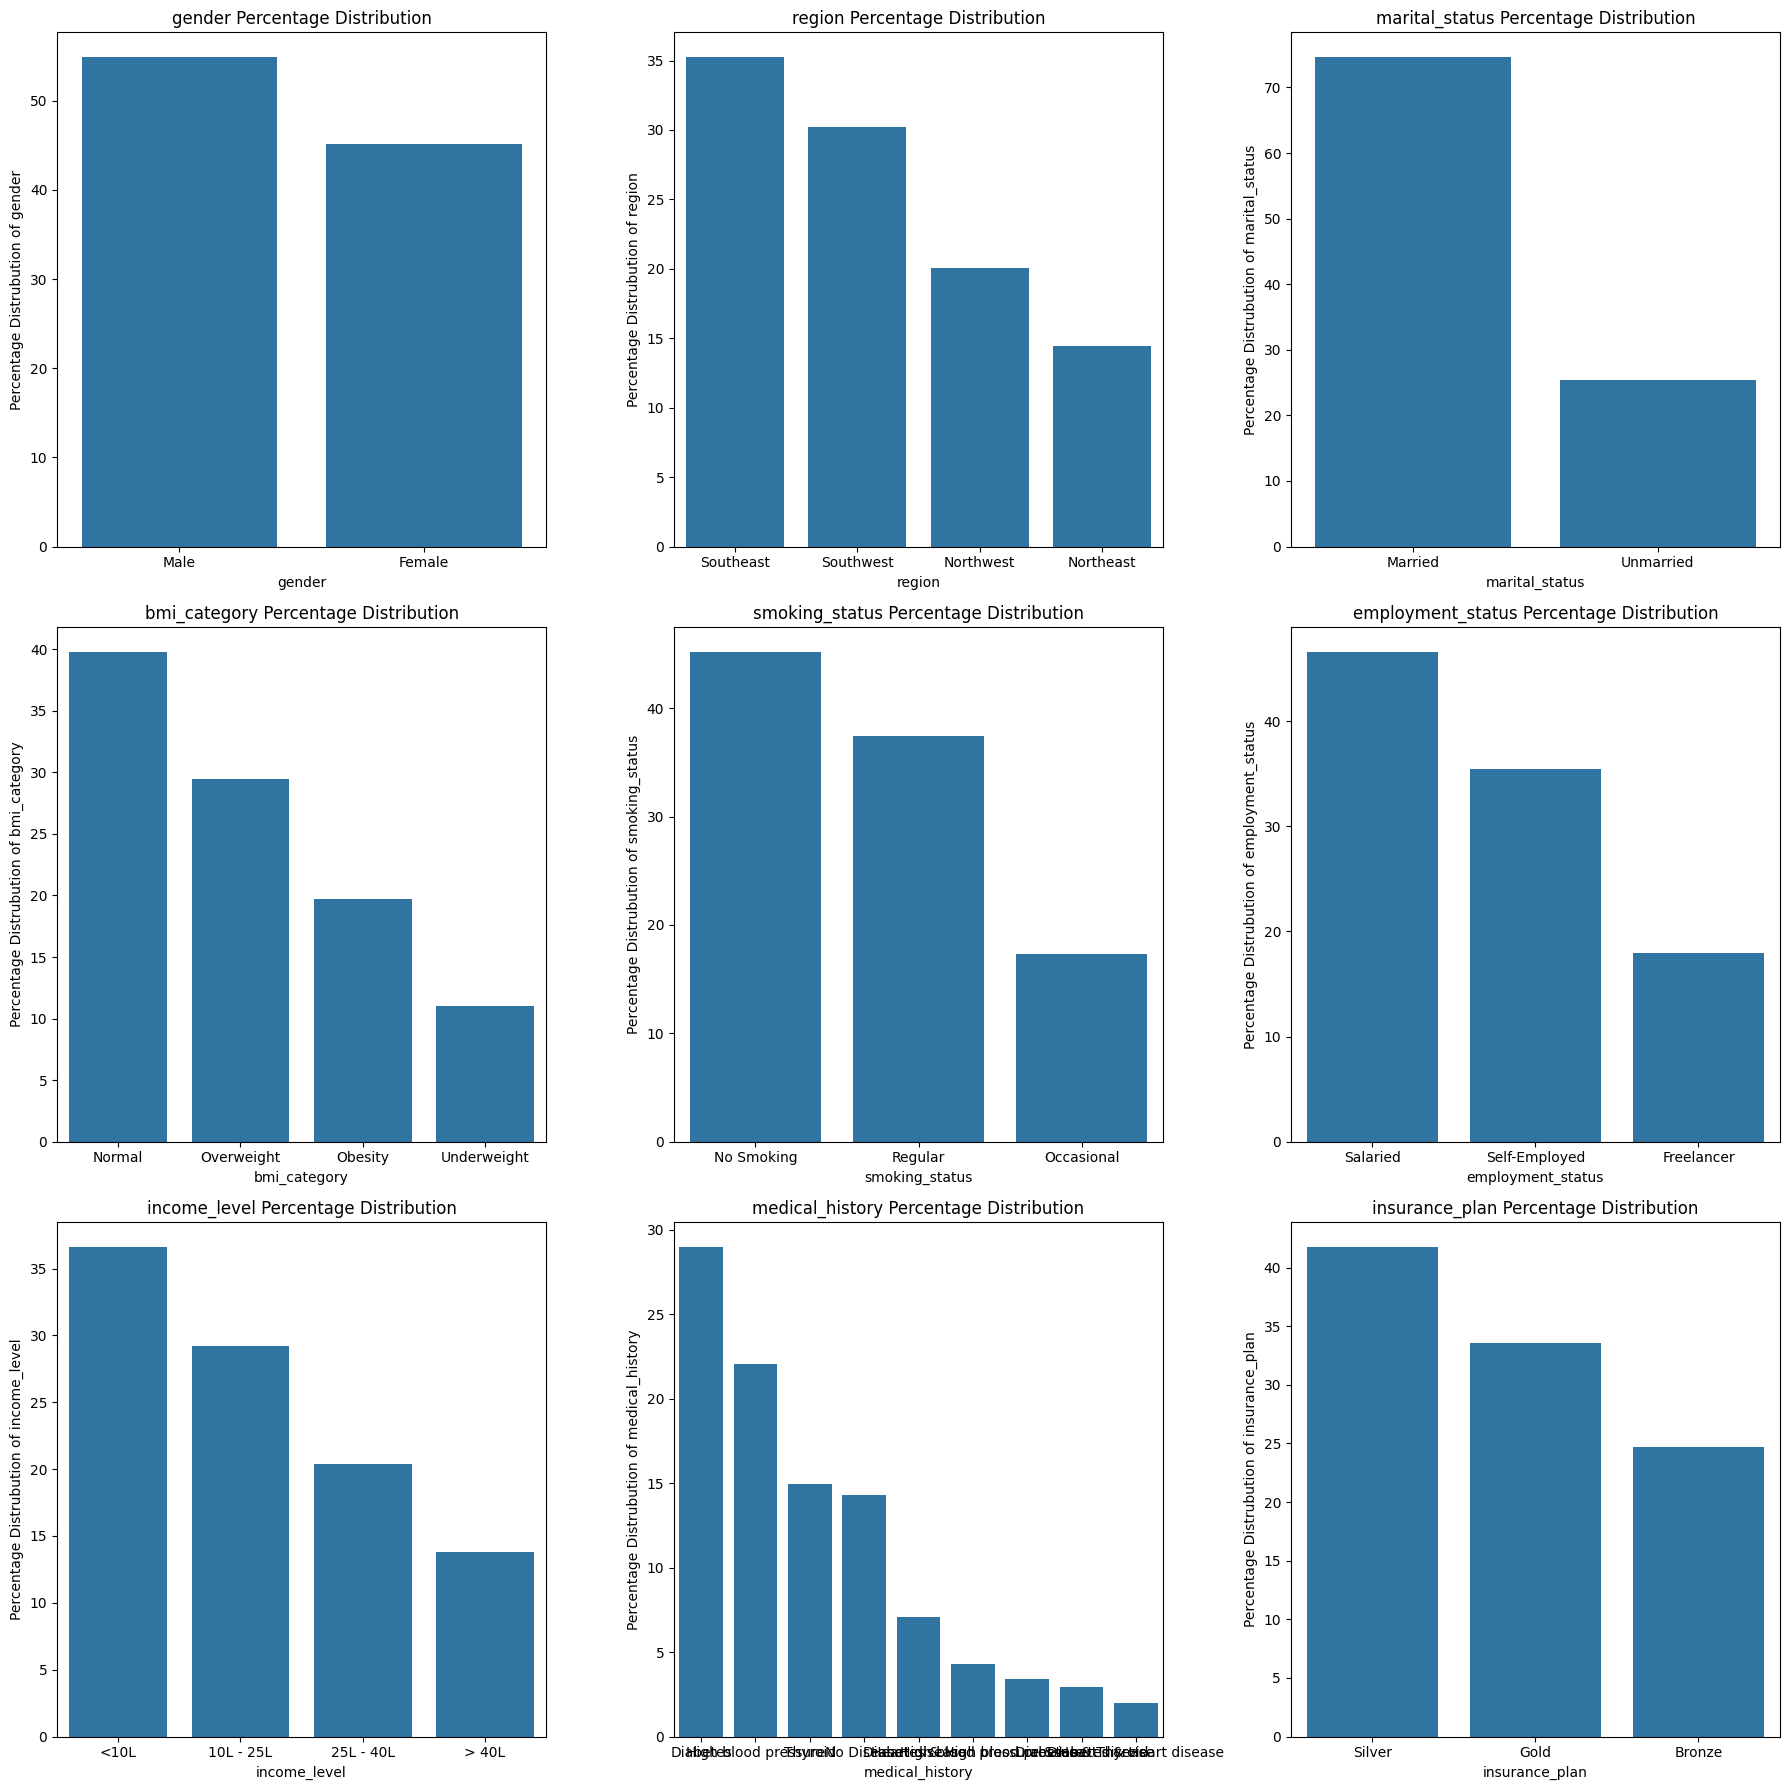

In [33]:
fig, axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten() 

for ax, column in zip(axes,categorical_columns):
    #Calculate the percentage distribution of each category 
     category_counts = df2[column].value_counts(normalize=True)*100
     sns.barplot(x=category_counts.index, y=category_counts.values, ax =ax)
     ax.set_title(f'{column} Percentage Distribution')
     ax.set_ylabel(f'Percentage Distrubution of {column}')
     ax.set_xlabel(column)
    

plt.tight_layout()
plt.show()
                
    

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


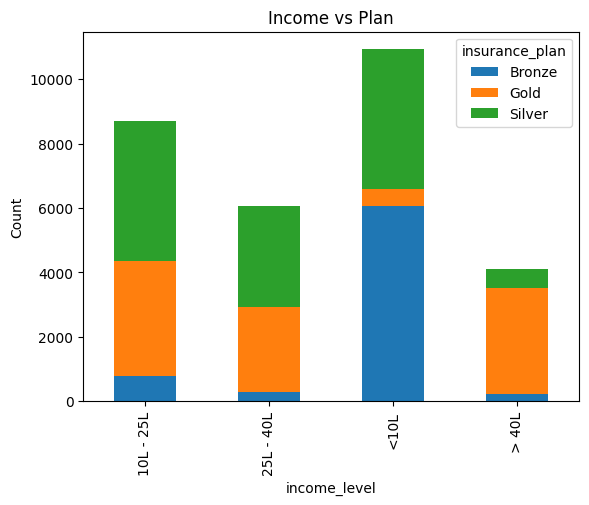

In [34]:
## Visualize multi-variable analysis using barplot 

crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='insurance_plan', ylabel='income_level'>

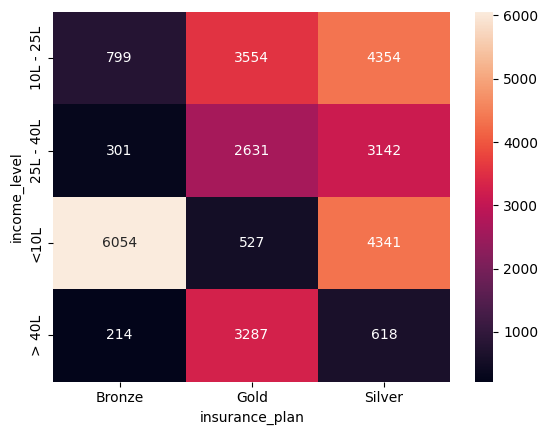

In [35]:
#Using heatmap to get more insights 

sns.heatmap(crosstab,annot=True,fmt="d")

### Feature Engineering 

In [36]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [37]:
risk_scores = {
       "diabetes" : 6, 
       "heart disease" : 8, 
       "high blood pressure" : 6, 
       "thyroid" : 5, 
       "no disease" : 0, 
       "none" : 0
}

In [38]:
df2[['disease1' , 'disease2']] = df2['medical_history'].str.split(" & " , expand = True).apply(lambda x: x.str.strip().str.lower())

In [39]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None


In [40]:
## Replace na value to none 

df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace= True)

C:\Users\prati\AppData\Local\Temp\ipykernel_29096\1831598098.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\prati\AppData\Local\Temp\ipykernel_29096\1831598098.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [41]:
df2['total_risk_score'] = 0 

for disease in ['disease1' , 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score']-min_score)/(max_score - min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,none,6,0.428571


In [42]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [43]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver': 2, 'Gold': 3})

In [44]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [45]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2 , '25L - 40L': 3, '> 40L': 4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


In [46]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2,columns=nominal_cols, drop_first=True, dtype=int)

In [47]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,diabetes,none,6,...,0,0,0,1,0,0,1,0,0,1


In [48]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


# Conduct correlation analysis of datasets

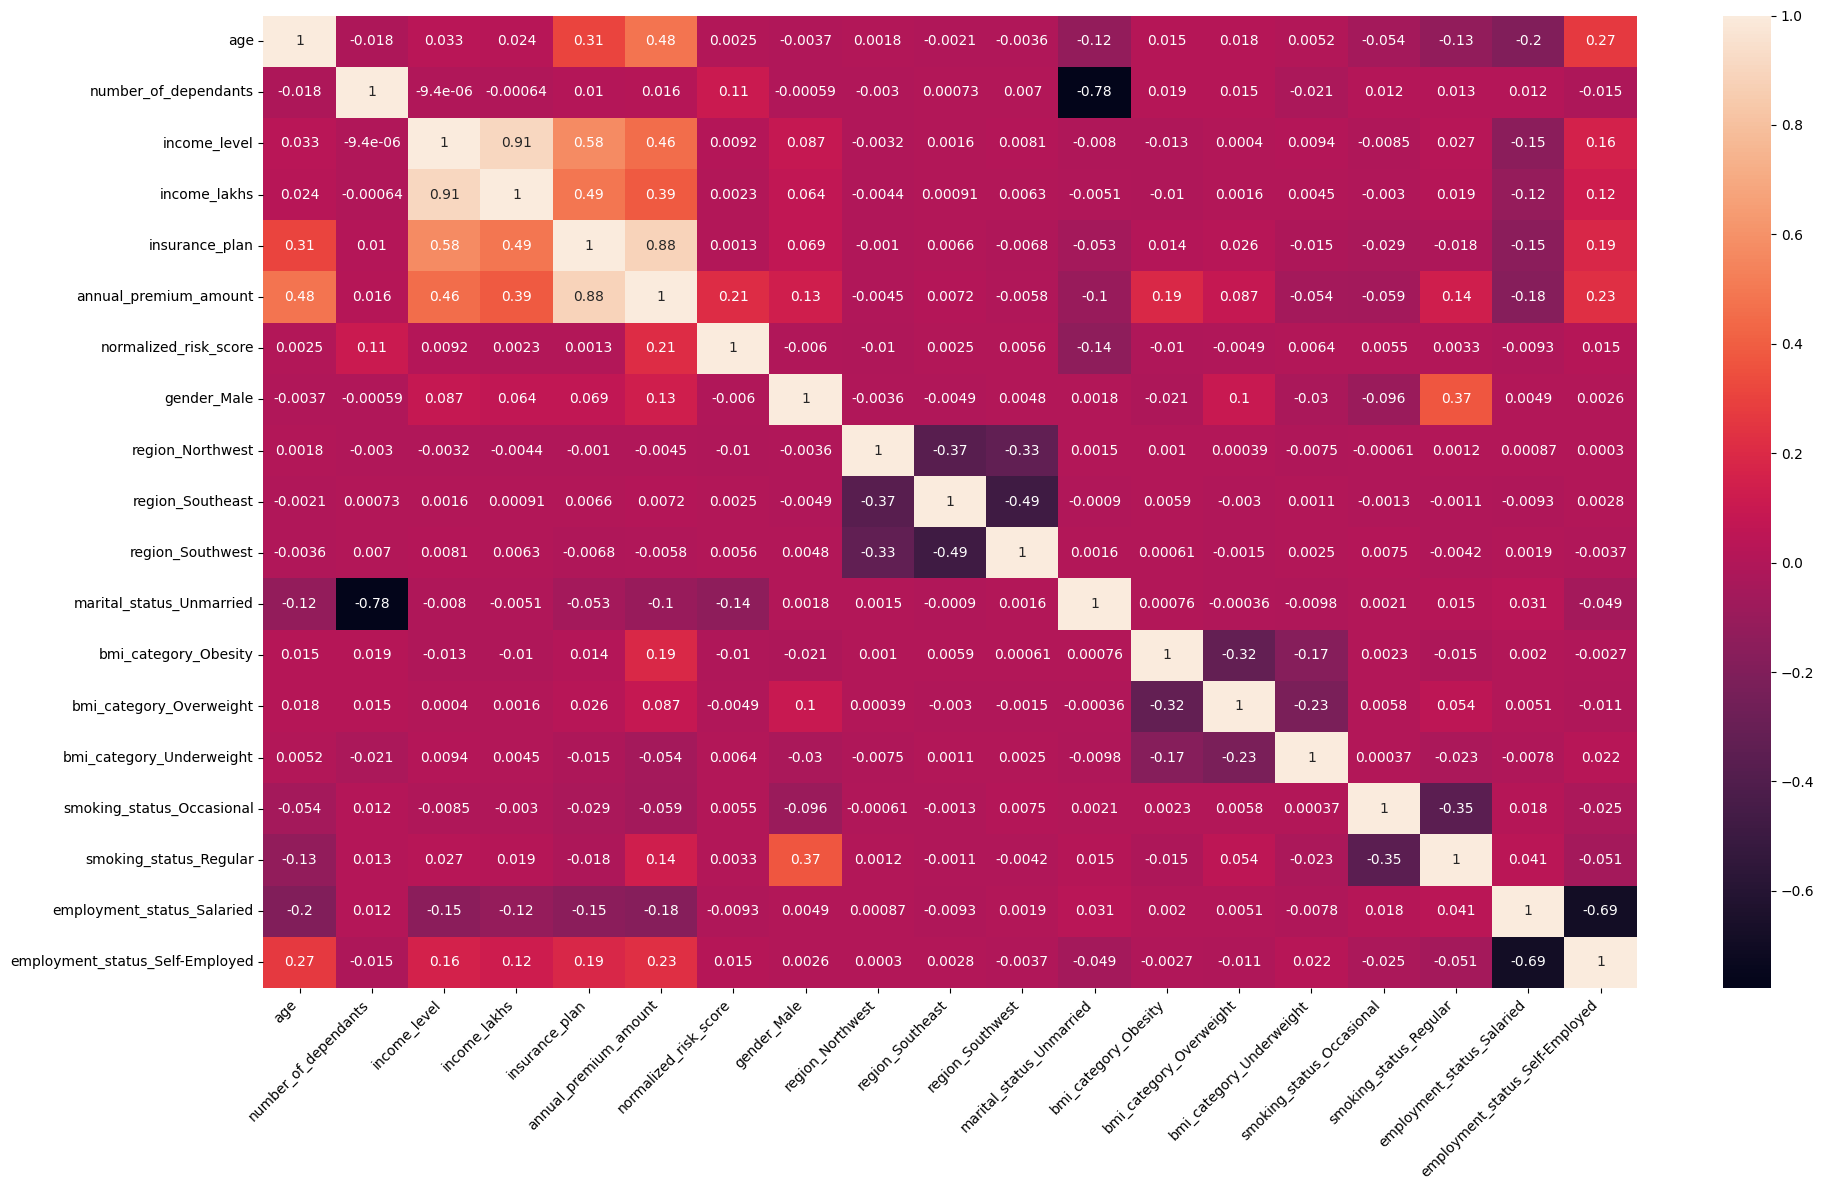

In [49]:
cm = df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [50]:
# Find the VIF score to select the related features 

X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

In [51]:
X.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'normalized_risk_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [52]:
from sklearn.preprocessing import MinMaxScaler 

cols_to_scale = ['age' , 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan'] 

scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Calcuate VIF

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns 
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [54]:
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalized_risk_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


### Model Training

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print("x train:" , X_train.shape)
print("x test:", X_test.shape)
print("y train", y_train.shape)
print("y test:" , y_test.shape)

x train: (20875, 18)
x test: (8947, 18)
y train (20875,)
y test: (8947,)


In [56]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test,y_test)
train_score, test_score

(0.9534823457118096, 0.9539009654285697)

In [57]:
model_lr.intercept_

np.float64(5942.72871753845)

In [58]:
model_lr.coef_

array([ 6982.64001765, -1313.1090829 ,  -414.37130409,  -187.87781849,
       14908.14261863,  6057.35585396,    43.35812684,   -52.76407712,
         -17.8038548 ,   -19.45771109,  -701.41871643,  3924.48720299,
        1977.32876982,   615.89864182,   837.02259505,  2802.45871967,
         -54.0146376 ,   247.81401635])

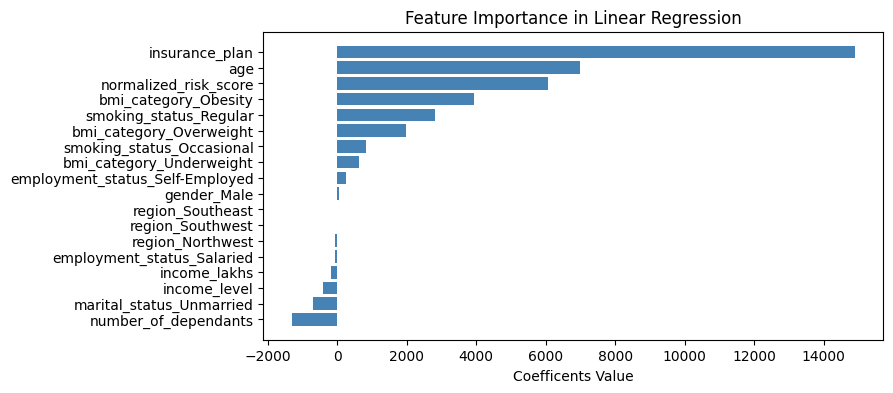

In [59]:
feature_importances = model_lr.coef_
coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficents']).sort_values(by= 'Coefficents', ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficents'],color='steelblue')
plt.xlabel('Coefficents Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

In [60]:
model_rg = Ridge()
model_rg.fit(X_train, y_train)
train_score_rg = model_rg.score(X_train, y_train)
test_score_rg = model_rg.score(X_test, y_test)
train_score_rg, test_score_rg

(0.9534821716389793, 0.953902278229871)

In [61]:
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score =model_xgb.score(X_test, y_test)
train_score, test_score


(0.9986513257026672, 0.9979508519172668)

In [62]:
y_pred = model_xgb.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("XGBRegressor==> MSE: " , mse_lr, "RMSE: " , rmse_lr)

XGBRegressor==> MSE:  96954.734375 RMSE:  311.3755519866645


### Using Randomsearch CV for better model training

In [63]:
model_xgb = XGBRegressor()
param_grid = {
 'n_estimators' : [20, 40, 50], 
 'learning_rate' : [0.01, 0.1, 0.2], 
 'max_depth' : [3,4,5]
}

In [64]:
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=30)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9980279207229614)

In [65]:
random_search.best_score_

np.float64(0.9980279207229614)

In [66]:
best_model = random_search.best_estimator_

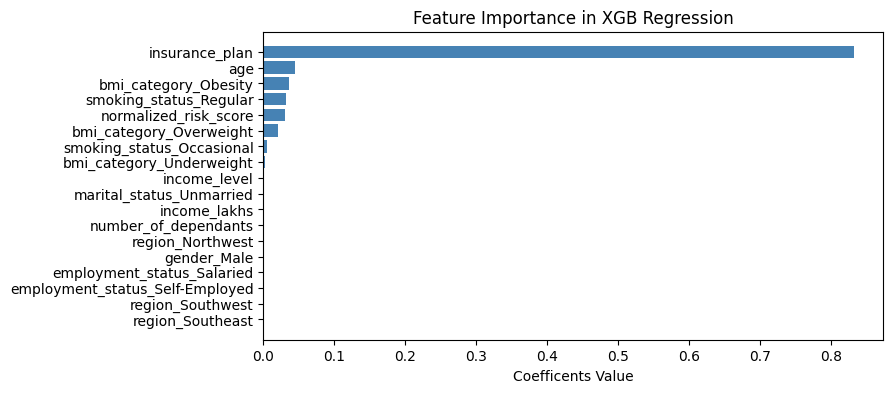

In [67]:
feature_importances_xgb = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importances_xgb, index=X_test.columns, columns=['Coefficents']).sort_values(by= 'Coefficents', ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficents'],color='steelblue')
plt.xlabel('Coefficents Value')
plt.title('Feature Importance in XGB Regression')
plt.show()

### Error Analysis

In [68]:
y_pred =  best_model.predict(X_test)
residuals = y_pred - y_test 
residuals_pct = residuals*100/y_test 

results_df = pd.DataFrame(
    { 'actual' : y_test, 
       'predicated' : y_pred, 
       'diff' : residuals,
       'diff_pct': residuals_pct
    }
)
results_df.head()

,actual,predicated,diff,diff_pct
19713,26895,26560.765625,-334.234375,-1.242738
14750,22734,22956.419922,222.419922,0.978358
19932,21198,21586.560547,388.560547,1.833006
29643,9100,9114.512695,14.512695,0.159480
17076,26434,26560.765625,126.765625,0.479555


<Axes: xlabel='diff_pct', ylabel='Count'>

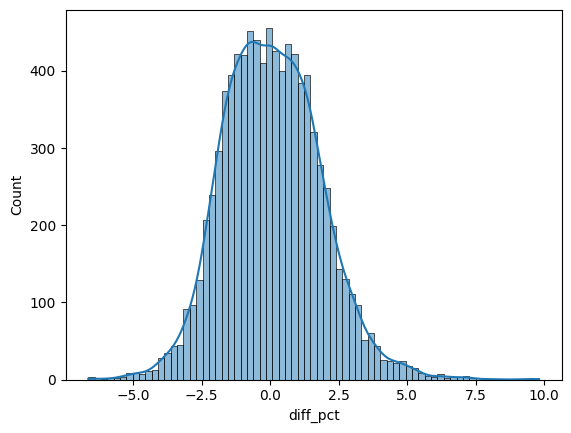

In [69]:
sns.histplot(results_df['diff_pct'], kde=True)

In [70]:
extreme_error_threshold = 5

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(89, 4)

In [71]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct 

0.9947468425170448

In [72]:
results_df[np.abs(results_df.diff_pct)>7].sort_values('diff_pct', ascending=False)

,actual,predicated,diff,diff_pct
7547,6538,7179.886719,641.886719,9.817784
6517,6552,7179.886719,627.886719,9.583131
12189,6571,7179.886719,608.886719,9.266272
8216,6635,7179.886719,544.886719,8.212309
21910,6651,7179.886719,528.886719,7.951988
9395,8505,9139.270508,634.270508,7.457619
13744,6691,7179.886719,488.886719,7.306632
27518,8502,9114.512695,612.512695,7.204337
21455,6699,7179.886719,480.886719,7.178485
24145,7627,8169.594238,542.594238,7.114124


### Finding the extreme error index and processing it

In [73]:
extreme_results_df.index

Index([10731,  9227, 13318, 22253, 27065, 19790, 20399,  5222,  8817, 26347,
        7495, 22534, 26645, 27518,  6093, 25561,  7547, 11398, 15211, 21910,
       12189, 23378,  2231, 27400, 24351, 21141,   420,  7619,   823, 27781,
        3934,  8216, 29457, 13973, 21621, 24145, 24093, 18522, 24532, 24909,
       22465, 26758, 20256,  2438, 16570,  4436, 22212,  8340, 13442, 18681,
       18252, 19145,  9054, 13221, 14990, 21455, 19210,  2223, 27126,  2337,
       25578,  5576,  8735, 11839,  7508, 10741, 26557,  6517,  2444, 19453,
       13744, 19833, 24119,  2695,  9395, 25658, 23828, 12778, 17894, 29695,
       12050,   252,   340, 22816,  7025, 11019, 14037,  7654, 25404],
      dtype='int64')

In [74]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10731,0.391304,0.8,0.333333,0.202020,0.5,0.000000,0,0,0,1,0,0,0,0,0,0,0,1
9227,0.217391,0.6,0.000000,0.000000,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
13318,0.347826,0.8,0.333333,0.131313,0.0,0.428571,1,1,0,0,0,0,0,0,1,0,1,0
22253,0.217391,0.6,0.000000,0.070707,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
27065,0.086957,0.4,0.000000,0.010101,0.0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1


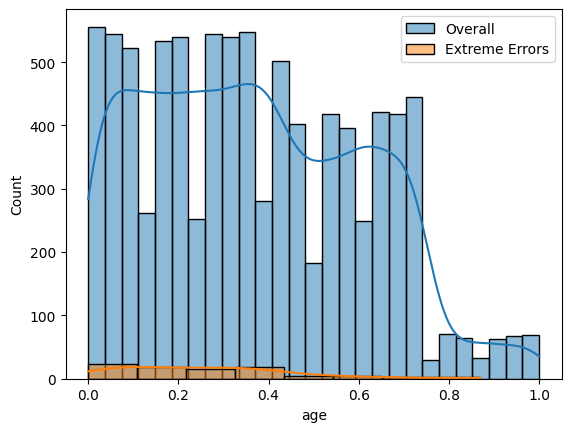

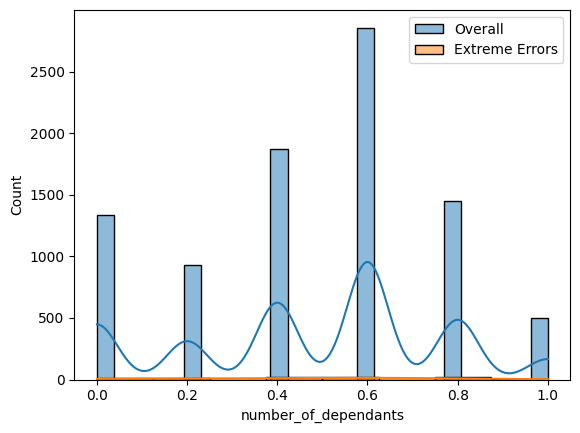

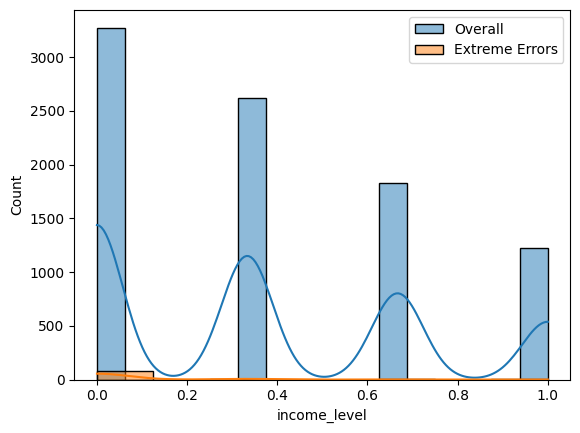

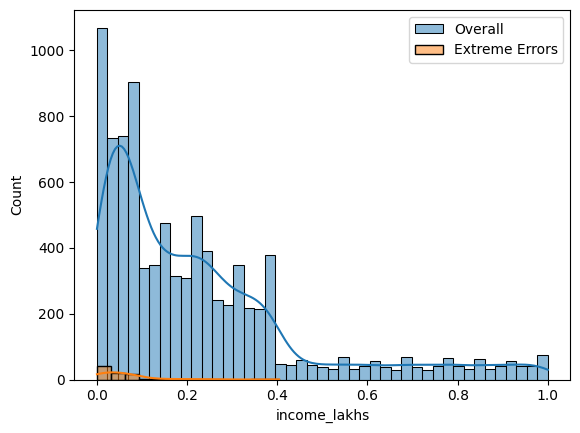

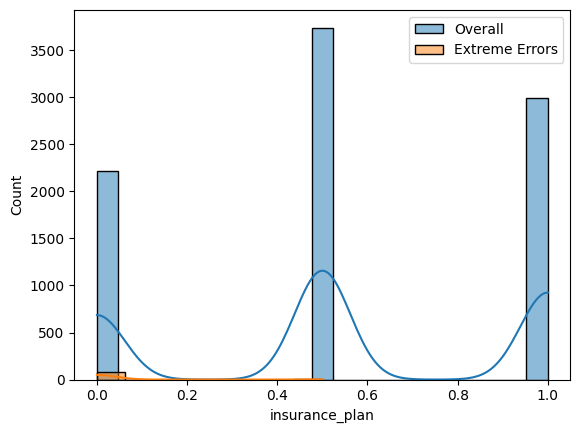

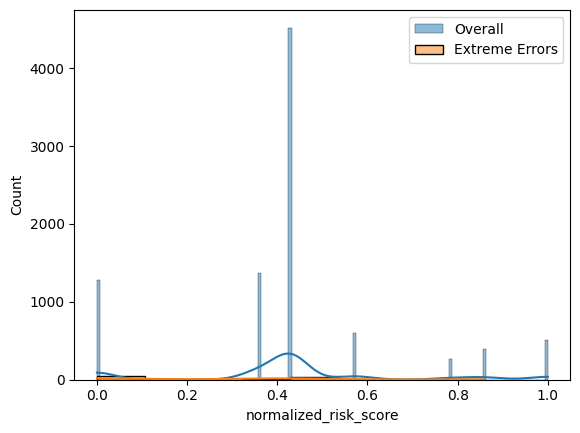

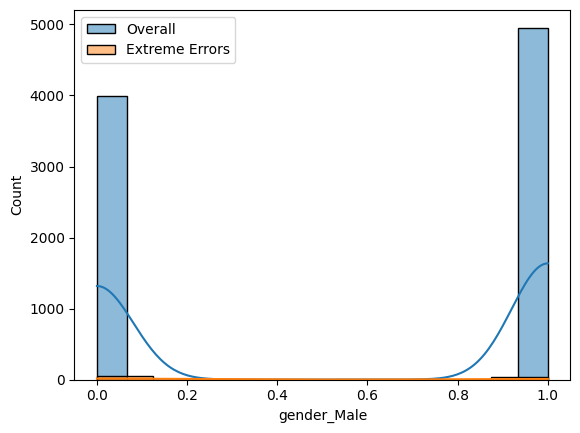

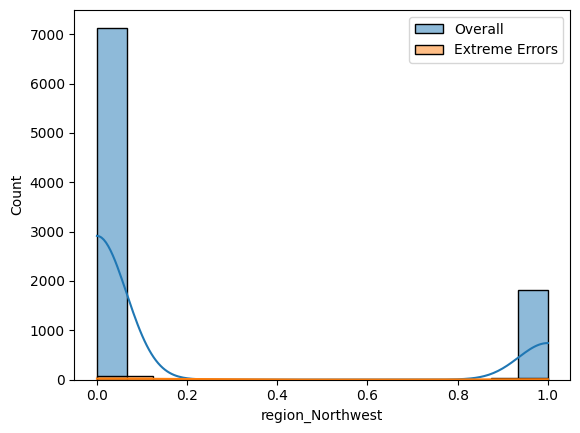

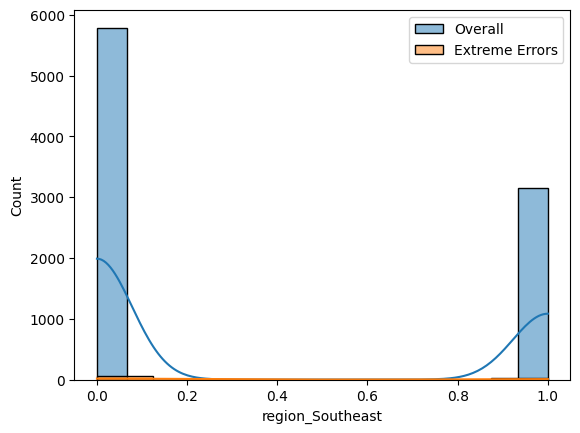

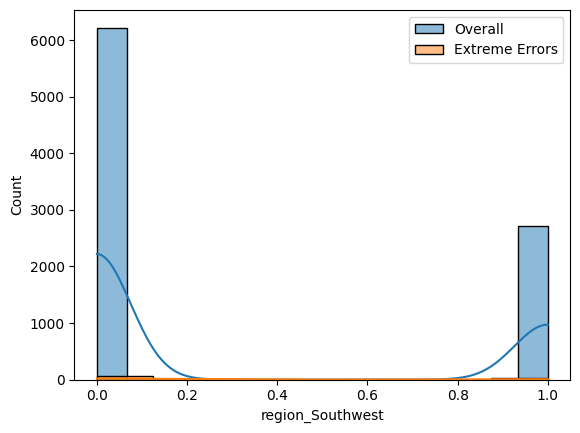

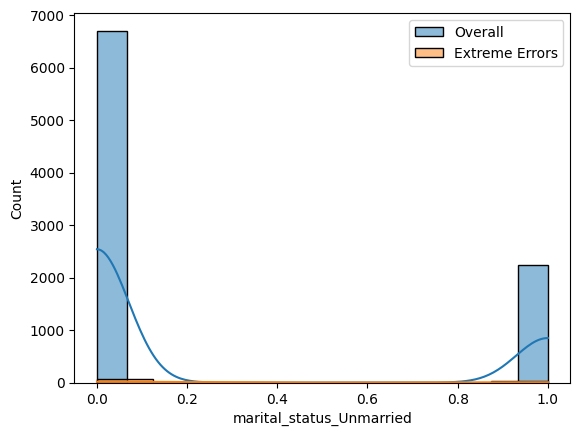

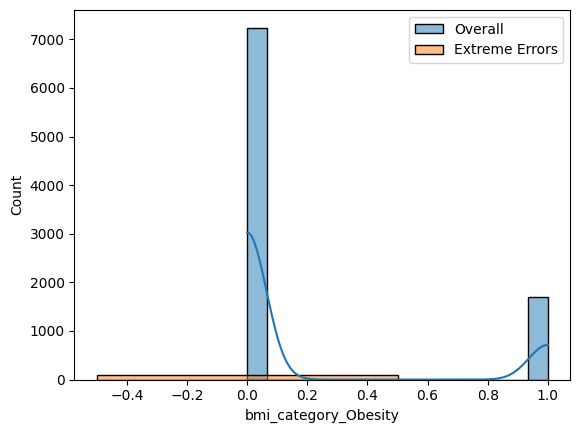

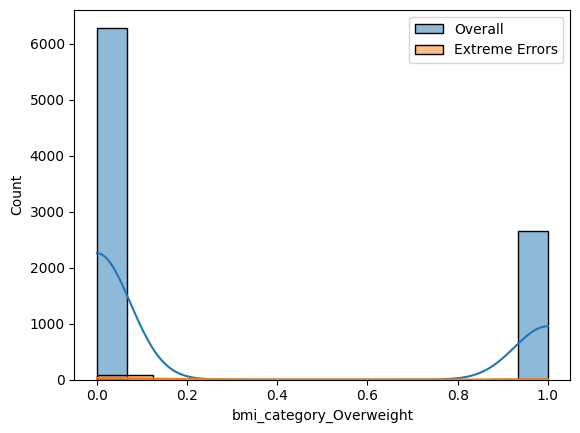

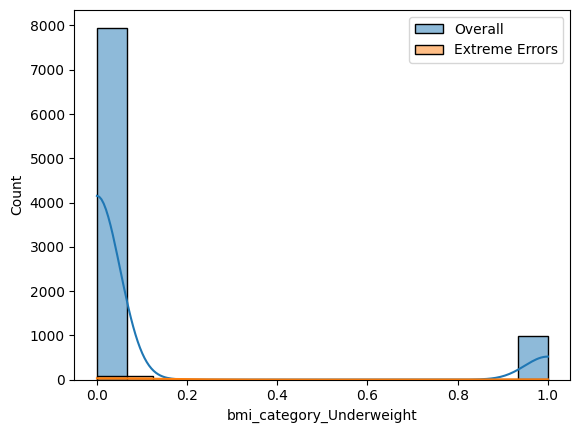

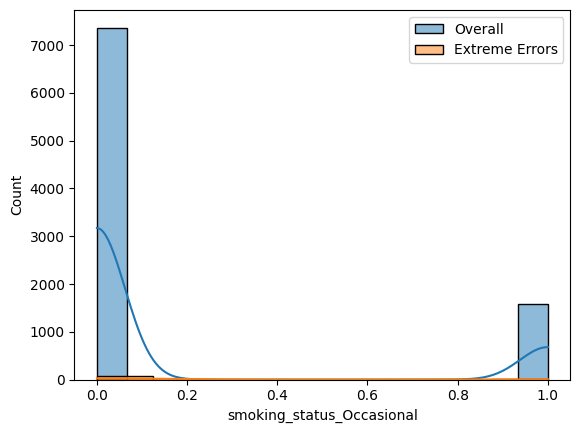

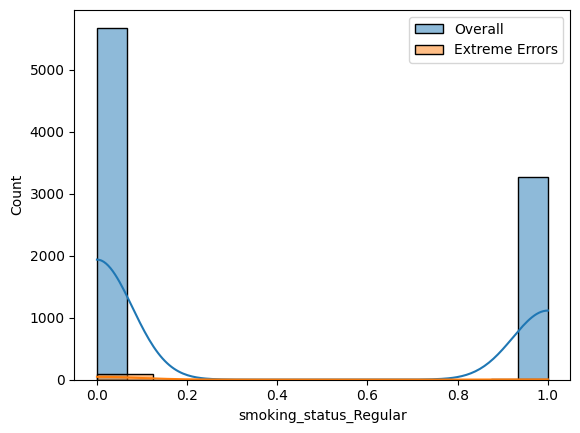

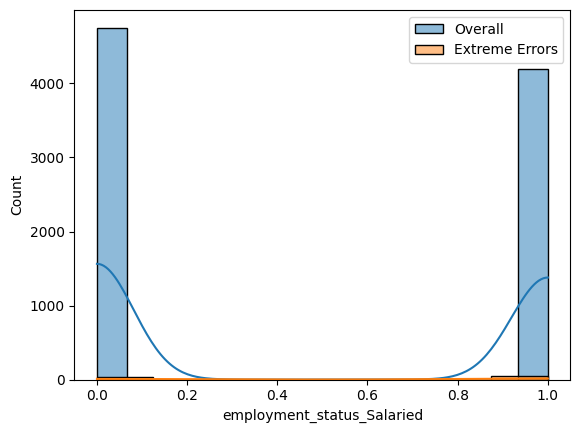

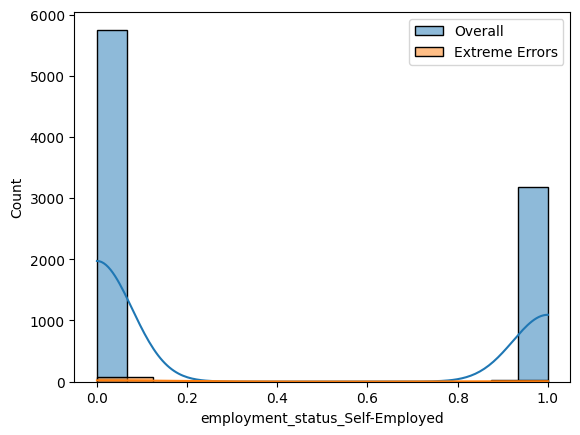

In [75]:
for feature in X.columns:
    sns.histplot(X_test[feature], label= "Overall", kde=True)
    sns.histplot(extreme_error_df[feature], label = "Extreme Errors",kde =True)
    plt.legend()
    plt.show()

In [76]:
extreme_error_df

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
10731,0.391304,0.8,0.333333,0.202020,0.5,0.000000,0,0,0,1,0,0,0,0,0,0,0,1
9227,0.217391,0.6,0.000000,0.000000,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
13318,0.347826,0.8,0.333333,0.131313,0.0,0.428571,1,1,0,0,0,0,0,0,1,0,1,0
22253,0.217391,0.6,0.000000,0.070707,0.0,0.357143,0,0,1,0,0,0,0,0,0,0,1,0
27065,0.086957,0.4,0.000000,0.010101,0.0,0.000000,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,0.086957,0.2,0.000000,0.030303,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0
11019,0.304348,0.2,0.000000,0.030303,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
14037,0.326087,0.4,0.000000,0.030303,0.0,0.428571,0,0,0,1,0,0,0,0,0,0,1,0
7654,0.065217,0.0,0.000000,0.080808,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,1,0


In [77]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [78]:
extreme_error_df['income_level'] = -1

In [79]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,44.0,4.0,-2.0,21.0,2.0
1,36.0,3.0,-2.0,1.0,1.0
2,42.0,4.0,-2.0,14.0,1.0
3,36.0,3.0,-2.0,8.0,1.0
4,30.0,2.0,-2.0,2.0,1.0
...,...,...,...,...,...
84,30.0,1.0,-2.0,4.0,1.0
85,40.0,1.0,-2.0,4.0,1.0
86,41.0,2.0,-2.0,4.0,1.0
87,29.0,0.0,-2.0,9.0,1.0


In [80]:
df_reversed['age'].quantile(0.97)

np.float64(58.36000000000001)

### Model Segmentation